<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Dependence and correlations
- Method of Least Squares

<hr/>

<h1><font color="yellow">Bivariate and Multivariate</font></h1>

### Dependence
- Consider random variables $X$, $Y\in\mathbb{R}$

> We can look at them separately but ...
>
> Are they "related" at all?

- Dependent variables

>$\displaystyle P(X, Y) \neq P(X)\,P(Y)$ 
> 
>More on this later...

### Covariance

- Definition 

>$\displaystyle \textrm{cov}(X,Y)=\mathbb{E}\Big[\big(X-\mathbb{E}[X]\big)\big(Y-\mathbb{E}[Y]\big)\Big]$  
>
> Other notations: $\mathrm{C}_{X,Y}$, $\sigma(X,Y)$, ...

- Sample covariance

>$\displaystyle C = \frac{1}{N\!-\!1}\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})$

### Quiz

1) If $X$ and $Y$ are independent, are they also uncorrelated?

        [ a] Yes      [ ] No
        
2) If $X$ and $Y$ are uncorrelated, are they also independent?

        [ ] Yes      [ a] No

### Correlation

>$\displaystyle \textrm{corr}(X,Y)=\frac{\textrm{cov}(X,Y)}{\sigma_X\,\sigma_Y}$  

- For example<br>
<img src="files/600px-Correlation_examples2.svg.png" width=500 align="left">


### Vector Notation

- Let $\boldsymbol{V}$ represent the 2-vector of random scalar variables $X$ and $Y$

>$\boldsymbol{V} = \begin{pmatrix}X\\Y\end{pmatrix}$

- Mean

>$\displaystyle \mathbb{E}[\boldsymbol{V}] = \begin{pmatrix}\mathbb{E}[X]\\\mathbb{E}[Y]\end{pmatrix} = \begin{pmatrix}\mu_X\\\mu_Y\end{pmatrix}$

- Covariance matrix

>$\displaystyle \Sigma_{\boldsymbol{V}} = \mathbb{E}\Big[\big(\boldsymbol{V}\!-\!\mathbb{E}[\boldsymbol{V}]\big)\big(\boldsymbol{V}\!-\!\mathbb{E}[\boldsymbol{V}]\big)^T\Big]$ $ = \left( \begin{array}{ccc}
\sigma_X^2 & \mathrm{C}_{X,Y}  \\
\mathrm{C}_{Y,X} & \sigma_Y^2  \end{array} \right)$
>
> Same generalization of variance works in any dimensions



### Bivariate Normal Distribution
- Independent and uncorrelated

>$ \displaystyle {\cal N}(x,y;\mu_x,\mu_y,\sigma_x,\sigma_y) = \frac{1}{2 \pi \sigma_x \sigma_y}\ \exp\left[-\frac{(x\!-\!\mu_x)^2}{2\sigma_x^2} -\frac{(y\!-\!\mu_y)^2}{2\sigma_y^2} \right] $

- In general, for 2-vector $\boldsymbol{x}$

>$ \displaystyle{\cal N}(\boldsymbol{x};\boldsymbol{\mu},\Sigma) = \frac{1}{2\pi \lvert \Sigma \rvert^{\frac{1}{2}} }\ \exp\left[-\frac{1}{2} (\boldsymbol{x}\!-\!\boldsymbol{\mu})^T \Sigma^{-1} (\boldsymbol{x}\!-\!\boldsymbol{\mu})\right]$
>
> where $\lvert \Sigma \rvert$ is the determinant - other notation $\det\Sigma$ or $\det\!\left(\Sigma\right)$

- Uncorrelated if

>$ \displaystyle \Sigma = \left( \begin{array}{ccc}
\sigma_X^2 & 0  \\
0 & \sigma_Y^2  \end{array} \right)$

### Multivariate Normal Distribution

- In $k$ dimensions - not bold but $k$-vectors


>$ \displaystyle{\cal N}(x;\mu,\Sigma) = \frac{1}{\sqrt{(2\pi)^{k} \lvert \Sigma \rvert} }\ \exp\left[-\frac{1}{2} (x\!-\!\mu)^T \Sigma^{-1} (x\!-\!\mu)\right]$

### Detour: Another way to Sample from Gaussians
- Uncorrelated ${\cal N}(0,I)$: Box-Muller transform 

> Using 2 uniform randoms between 0 and 1
>
>$ Z_1 = \sqrt{-2\ln U_1}\,\cos\big(2\pi U_2\big)$ 
>
>$ Z_2 = \sqrt{-2\ln U_1}\,\sin\big(2\pi U_2\big)$ 

- Tranform: scale, rotate, shift


In [150]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import scipy

(2, 1000)
(2,)
[2.14830136 5.15517324]


array([2.14830136, 5.15517324])

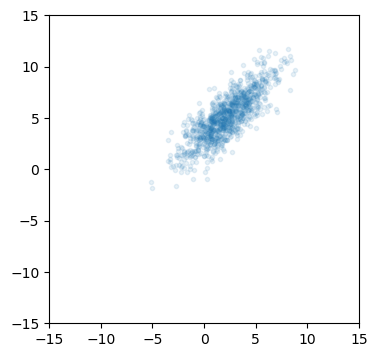

In [151]:
# generate many 2D (column) vectors
X = scipy.stats.norm(0,1).rvs((2,1000))
# X is 2x1000
# multiply the first coordinate of every point in the first column by 3
X[0,:] *= 3  # scale the x-coordinates by 3 (multiply every digit in the first row by 3)
# : means every y coordinate

f = np.pi/4    # rotate by f which is a 45 degree rotation
R = np.array([[np.cos(f),-np.sin(f)], 
              [np.sin(f), np.cos(f)]]) 
V = R @ X
# @ is matrix multiplication
# R is a 2x2 matrix
# X is 2x1000
# V is 2x1000
V += np.array([[2],
               [5]]) # shift with a vector
# how is a 2x1000 vector being added to a 2x1 vector?
# numpy broadcasts the addition which means that
# the vector [2,5] is added to every column of V
# The mean was originally 0,0 and now it is 2,5
# plot on square figure
print(V.shape)
plt.figure(figsize=(4,4)); a=15; plt.xlim(-a,a); plt.ylim(-a,a)
plt.plot(V[0,:],V[1,:], '.', alpha=0.1)

# sample average
averages = V.mean(axis=1) 
# axis=1 means that the mean is taken with respect to the rows of V
# first element in averages is the mean of the first row of V
# second element in averages is the mean of the second row of V
print (averages.shape)
print (averages)
# the mean is a 1d vector with 2 elements
averages

In [152]:
#avg = averages.reshape(averages.size,1)
avg = averages[:,np.newaxis] 
# the newaxis is used to increase the dimension of the existing array by one more dimension, when used once.
# ths is used to convert a 1d average array into a 2d array
# this is so that we can subtract the 2d average array from the 2d V array by broadcasting
print ("Average: ")
print (avg)
print (avg.shape)

# sample covariance matrix
C = (V - avg) @ (V - avg).T / (V.shape[1] - 1) 
print ("Cov:")
print (C) 
print (C.shape)

Average: 
[[2.14830136]
 [5.15517324]]
(2, 1)
Cov:
[[5.13290734 4.16042667]
 [4.16042667 5.11464619]]
(2, 2)


<h1><font color="yellow">Method of Least Squares</font></h1>

### The Idea

- Fit a model to training set $\big\{ (x_i, y_i) \big\}$ where x_i are inputs and y_i are outputs

> Parameterized function $f(x;\theta)$, where $\theta$ can represent multiple parameters

- Minimize the mean or sum of square errors or residuals (SSE, SSR, MSE, MSR?)

> Residual   
>$r_i(\theta) = y_i - f(x_i;\theta)$
>
> Estimation  
>$\displaystyle \hat{\theta} = \arg\min_{\theta} \sum_i \big[y_i-f(x_i;\theta)\big]^2$
 
- Optimization is simple for certain models

### The Simplest Case
- Fitting a constant? Model with $f(x;\mu)=\mu$

>$\displaystyle C(\mu) = \sum_{i=1}^N \big(y_i\!-\!\mu\big)^2$

- Derivative $C'= dC \big/ d\mu$ vanishes at solution $\hat{\mu}$

>$\displaystyle C'(\hat{\mu}) = 0$
>
>$\displaystyle 2\sum_{i=1}^N \big(y_i\!-\!\hat{\mu}\big)(-1)=0$
>
>$\displaystyle \sum_{i=1}^N y_i - N \hat{\mu} = 0 $
>
>$\displaystyle \hat{\mu} = \frac{1}{N}\sum_{i=1}^N y_i \ \ \ \ \ $  -  average

In [153]:
import numpy as np
from scipy.optimize import minimize

# Given data points
y = np.array([2, 4, 6, 8, 10])

# C(mu) is the cost function
def C(mu):
    return np.sum((y - mu)**2)
# cost function is modeled by the sum of the square of the differences between the data points and the mean (least squares)
# we want to minimize the cost function by taking the derivative and setting it to 0 and solving for mu

result = minimize(C, x0=0)
print("Optimized Best fit mu",result.x)

# Calculate the best fit mu
mu_hat = y.mean()

print("Best fit mu:", mu_hat)

Optimized Best fit mu [5.99999988]
Best fit mu: 6.0


### Heteroscedasticity
- Same model with $f(x;\mu)=\mu$

>$\displaystyle C(\mu) = \sum_{i=1}^N \frac{\big(y_i\!-\!\mu\big)^2}{\sigma_i^2} $
>
> with  $\ w_i=1 \big/ \sigma_i^2$
>
>$\displaystyle  C(\mu) = \sum_{i=1}^N w_i\big(y_i\!-\!\mu\big)^2 $

- Derivative $C'= dC \big/ d\mu$ vanishes at $\hat{\mu}$

>$\displaystyle C'(\hat{\mu}) = 0$
>
>$\displaystyle 2\sum_{i} w_i \big(y_i\!-\!\hat{\mu}\big)(-1)=0$
>
>$\displaystyle \sum_{i} w_i y_i - \hat{\mu}\sum_{i} w_i  = 0 $
>
>$\displaystyle \hat{\mu} = \frac{\sum w_i y_i}{\sum w_i} \ \ \ \ \ \ $ - weighted average

describe a situation where the variability, or variance, of the error terms, or residuals, of a regression model is not constant across all levels of the independent variables. In other words, the spread of the residuals varies along with the independent variable.

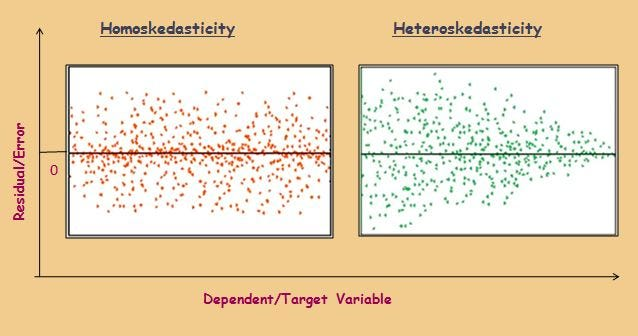

### Simple Fitting
- A linear model with $\boldsymbol{\theta}=(a,b)^T$ parametrization $f(x;\boldsymbol{\theta}) = a + b\,x$
  
>$\displaystyle \hat{\boldsymbol\theta} = \arg\min \sum_i \big[y_i-(a + b\,x_i)\big]^2$
- argmin means we are looking for the parameters of $\theta$ that minimize the residuals between the observed values of y and the values of y predicted when fitting a line to the data.
- $hat{\boldsymbol\theta}$ is the value of theta that minimizes the sum of the squared differences between the observed values of y and the values of y predicted by the linear equation.
- Derivatives w.r.t. $a$ and $b$ should vanish

> We have 2 variables and 2 equations
> <br/><br/>
> Quadratic becomes linear $\rightarrow$ analytic solution!

In [154]:
import numpy as np
from scipy.optimize import minimize

# Define the model function which is linear
def f(x, theta):
    a, b = theta
    return a + b * x

# Define the cost function
def cost(theta, x, y):
    return np.sum((y - f(x, theta))**2)

# Given data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2.1, 2.9, 4.15, 5.1, 6.1, 6.8])

# Initial guess for theta
theta_guess = np.array([0, 0])

# Minimize the cost function
result = minimize(cost, theta_guess, args=(x, y))

# Print the best fit theta
print("Best fit theta:", result.x)

Best fit theta: [2.09285718 0.97285713]


#### Unhomework

1. Derive the best fit parameters of $(a,b)$

### Linear Regression
- A linear combination of known $\phi_k(\cdot)$ functions (basis functions)
- set of basis function is called basis set
- functions are called linear basis functions and are denoted by $\phi$
- Functions can be nonlinear but are combined linearly


>$\displaystyle f(x;\boldsymbol{\beta}) = \sum_{k=1}^K \beta_k\, \phi_k(x) $
> <br/><br/>
> It's a dot product
> <br/><br/>
>$\displaystyle f(x;\boldsymbol{\beta}) = \boldsymbol\beta^T \boldsymbol\phi(x)$ 
> <br/><br/>
>with $\boldsymbol{\beta}=(\beta_1,\dots,\beta_K)^T$


- Linear in $\boldsymbol{\beta}$, cost function is quadratic

>$\displaystyle C = \sum_{i=1}^N \left\{ y_i - \sum_{k=1}^K \beta_k\, \phi_k(x_i) \right\}^2$

A linear combination of basis functions is a sum of the basis functions, each multiplied by a corresponding coefficient.

For example, if we have a set of basis functions {φ1(x), φ2(x), φ3(x), ..., φn(x)}, a linear combination of these basis functions would look like:

f(x) = β1φ1(x) + β2φ2(x) + β3φ3(x) + ... + βnφn(x)

Here, each βi is a coefficient, and each φi(x) is a basis function. The function f(x) is a linear combination of the basis functions.

In [155]:
import numpy as np
from scipy.optimize import minimize

# Define the basis functions
phi = [lambda x: 1,  # phi_1(x) = 1
       lambda x: x,  # phi_2(x) = x
       lambda x: x**2]  # phi_3(x) = x^2
print(phi)
K = len(phi)

# Define the model function f(x) = sum(beta_k * phi_k(x)
def f(x, beta):
    return sum(beta[k] * phi[k](x) for k in range(K))

# Define the cost function C(beta) = sum(y_n - f(x_n))^2
def cost(beta, x, y):
    return np.sum((y - f(x, beta))**2)

# Given data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2.1, 2.9, 4.15, 5.1, 6.1, 6.8])

# design matrix
# X = [[1, x_1, x_1^2],
#      [1, x_2, x_2^2],
#      [1, x_3, x_3^2],
#      [1, x_4, x_4^2],
#      [1, x_5, x_5^2],
#      [1, x_6, x_6^2]]
# X is a matrix with 3 columns and 6 rows
X = np.array([[phi[k](x_n) for k in range(K)] for x_n in x])
print(X)

# Initial guess for beta (all zeros)
# need to do this because the minimize function requires an initial guess
beta_guess = np.zeros(K)

# Minimize the cost function
result = minimize(cost, beta_guess, args=(x, y))

# using y hat model
H = np.dot(X,np.dot(np.linalg.inv(np.dot(X.T, X)), X.T))

y_hat = np.dot(H,y)
print("y hat: ", y_hat)

# Print the best fit beta
print("Best fit beta:", result.x)

[<function <lambda> at 0x147497ec0>, <function <lambda> at 0x147497f60>, <function <lambda> at 0x147494400>]
[[ 1  0  0]
 [ 1  1  1]
 [ 1  2  4]
 [ 1  3  9]
 [ 1  4 16]
 [ 1  5 25]]
y hat:  [2.00357143 3.08357143 4.11       5.08285714 6.00214286 6.86785714]
Best fit beta: [ 2.00357098  1.10678642 -0.02678586]



- Introducing the design matrix $X$ with components

>$\displaystyle X_{ik} = \phi_k(x_i) $

- Linear in $\boldsymbol{\beta}$, cost function is quadratic

>$\displaystyle C = \sum_{i=1}^N \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k\right\}^2$




### Minimization

- Partial derivatives
  

>$\displaystyle \frac{\partial{}C}{\partial{}\beta_l} = 2\sum_i \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k \right\} 
\left[ -\frac{\partial f(x_i;\boldsymbol{\beta})}{\partial \beta_l} \right]$
> <br/><br/>
> and
> <br/><br/>
>$\displaystyle \frac{\partial f(x_i;\boldsymbol{\beta})}{\partial \beta_l} =\sum_k \frac{\partial{}\beta_k}{\partial{}\beta_l}\,\phi_k(x_i) = \phi_l(x_i) = X_{il}$
> <br/><br/>
> **Note:** $\partial{}\beta_k \big/ \partial{}\beta_l=\delta_{kl}$ Kronecker delta

### Detour: The Kronecker Delta

- Definition of Kronecker Delta

The Kronecker delta $\delta_{kl}$ is a function of two variables that is 1 if the variables are equal and 0 otherwise. It is defined as:

$\delta_{kl} = 
\begin{cases} 
1 & \text{if } k=l \\
0 & \text{if } k\neq l 
\end{cases}$

This function is useful in many areas of mathematics and physics, and it's good to remember its definition.

>$ \displaystyle \sum_l \delta_{kl}\,a_l = a_k$
> <br/><br/>
> Cf. identity matrix:
>$ I\, \boldsymbol{a} = \boldsymbol{a}$

### Result

- At the optimum we have


>$\displaystyle \sum_i \left\{ y_i - \sum_{k} \hat\beta_k\, \phi_k(x_i) \right\}\, \phi_l(x_i)  = 0$
> <br/><br/>
>$\displaystyle \sum_i \left\{ y_i - \sum_{k} X_{ik}\hat\beta_k\ \right\}\, X_{il}  = 0$
> <br/><br/>
>$\displaystyle \sum_i X_{il} y_i  - \sum_i \sum_k  X_{il} X_{ik} \hat{\beta}_k = 0$
> <br/><br/>
>$\displaystyle \sum_i  X_{il} y_i = \sum_k \left(\sum_i X_{il} X_{ik}\right) \hat{\beta}_k$

- I.e.,

>$\displaystyle X^T y = X^T X \hat{\beta} $
> <br/><br/>
>$\displaystyle \hat\beta = (X^T X)^{-1} X^T y = X^+ y$

- See **Moore-Penrose pseudoinverse**, **generalized inverse**

- See also **Singular Value Decomposition**

### Hat matrix

- Looking at the definition of $X$ we see that the model at $\hat{\beta}$ predicts $\hat{y}_i$ values

>$\displaystyle \hat{y} = X\,\hat\beta = X\,(X^T X)^{-1} X^T y $
> <br/><br/>
> which is
> <br/><br/>
>$\displaystyle \hat{y}  = H\,y\ \ \ $
> with 
>$\ \ \displaystyle {H} = X\,(X^T X)^{-1} X^T$

(50,)


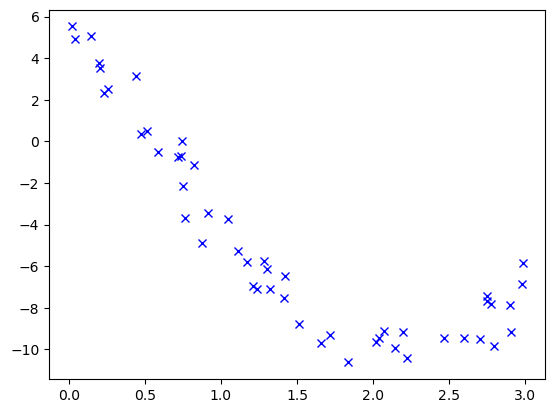

In [156]:
# generate sample with error
# x has 50 points between 0 and 3
# x is a 1d array with 50 elements
# rand generates random numbers between 0 and 1
x = 3 * np.random.rand(50) # between 0 and 3

# e is a  vector of random noise
# randn generates random numbers from a normal distribution with values between -1 and 1
e = 1 * np.random.randn(x.size) # normal noise
# print(e)

y = 10 * np.cos(x + 1) + e  
print(y.shape)
plt.plot(x, y, 'bx');

(50, 2)


-4.462984898178404

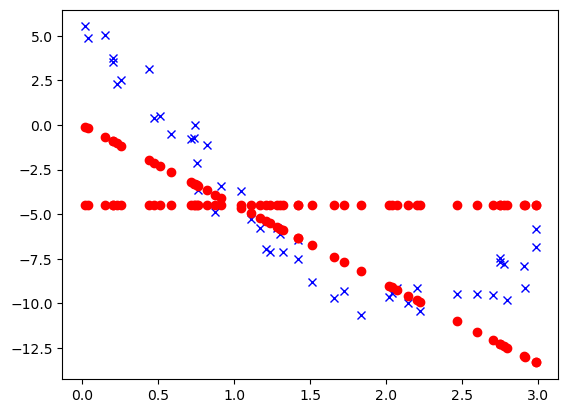

In [157]:
# linear model f(x) = b0 + b1 x
# X is a matrix with 2 columns and 50 rows
# X is modeling our design matrix
X = np.ones((x.size,2));
# print(X.shape)
# X[:,1] is the second column of X which is set to x
X[:,1] = x
print(X.shape)
# print(X)

# Xpinv is the (X * X^T)^-1 * X^T
Xpinv = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
# bHat is Xpinv * y
bHat = np.dot(Xpinv, y)
aHat = bHat[0] # this is our intercept
bHat = bHat[1] # this is our slope


# calculate yHat
yHat = np.dot(X, bHat)

plt.plot(x,y,'bx'); plt.plot(x,yHat,'ro'); bHat

array([ 1.73535561, -4.4629849 ])

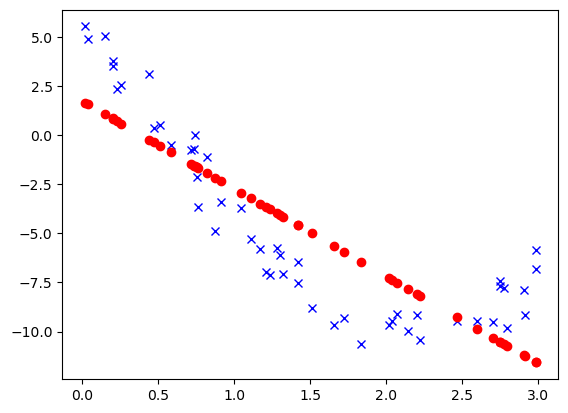

In [158]:
# same using the @ operator
Xpinv = np.linalg.inv(X.T @ X) @ X.T
bHat = Xpinv @ y
yHat = X @ bHat

plt.plot(x,y,'bx'); plt.plot(x,yHat,'ro'); bHat

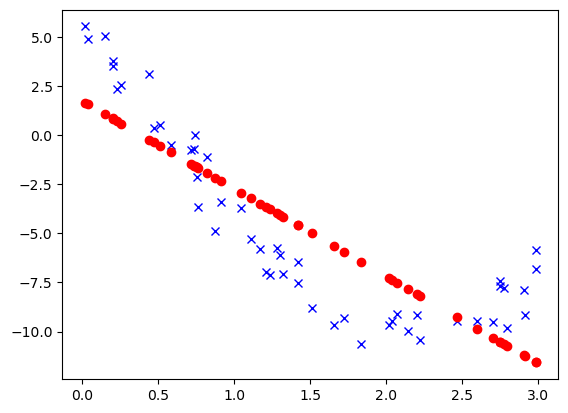

In [159]:
#TODO Why is this the same? What is the pinv() function doing? How does it work?
# same again with pinv() and the Hat matrix
H = X @ np.linalg.pinv(X)
yHat = H @ y

plt.plot(x,y,'bx'); plt.plot(x,yHat,'ro');

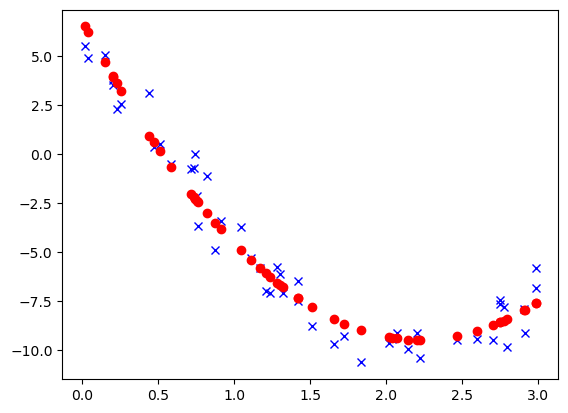

In [160]:
# linear model f(x) = b0 + b1 x + b2 * x^2
X = np.ones((x.size,3));
X[:,1] = x   # partials wrt. b1
X[:,2] = x*x # wrt. b2

# sames as before
bHatQ = np.linalg.pinv(X) @ y
yHatQ = X @ bHatQ

plt.plot(x,y,'bx'); plt.plot(x,yHatQ,'ro');

### Unhomework

1. Fit a 3rd order polynomial to the same data

1. Fit $f(x;\beta_0,\beta_1) = \beta_0\sin(x) + \beta_1\cos(x)$

1. Evaluate the best fits on a grid of 1000 equally-spaced points in $[-1,4]$

1. Plot them in one figure

# Important Note
In Python, especially when using libraries like NumPy, a column vector is considered a 2-dimensional array. This is because it has two dimensions: one dimension with size 50 (the rows), and another dimension with size 1 (the column).

When you reshape x with x = x.reshape(-1,1), you're telling NumPy to figure out the correct number of rows (-1 is a placeholder that NumPy fills in) and to make sure there's exactly 1 column. The result is a 2-dimensional array with shape (50, 1).

Even though it might seem like x should be a 1-dimensional array because it only has one column, in NumPy it's still considered 2-dimensional. This is important for certain operations that expect 2-dimensional input, and it allows you to do matrix operations like dot products and matrix multiplication.

So, while x is a column vector in mathematical terms, in terms of NumPy's data structures, it's a 2-dimensional array.

(50,)
[0.29881569 1.24697718]
sin of first 2 elements: [0.29438859 0.94802712]
x size: 50
y shape: (50,)
X shape: (50, 2)
X first column: (50,)
X first 2 rows: [[0.29438859 0.95568581]
 [0.94802712 0.31818953]]
b shape: (2,)
Fitted coefficients: [-8.64963722  5.42312954]
Fitted values: [  2.63645345  -6.47450766  -8.85180873   3.83938618  -6.68699289
  -8.27312597  -8.41585651  -1.68889048  -0.98025209   3.41547699
  -2.03355603  -4.08762466  -9.96052193   1.17616389  -9.79112055
  -7.31821294  -9.78282139  -7.56986178   1.17493886  -0.31719141
  -9.09368215  -4.5808575    3.10616565 -10.00150589  -1.59022457
  -9.9081405   -2.32253875  -0.51802179 -10.14813663  -1.36647238
 -10.19807046   3.30428068   5.37309396  -7.03875691  -8.58965527
   3.0981536   -5.74753882  -4.28350834 -10.17496119  -7.9927056
  -1.54654174  -6.24619714  -1.23446534  -9.13154031   0.94284991
   4.37995533  -5.54126629  -6.55928921  -6.55224675   4.44256083]


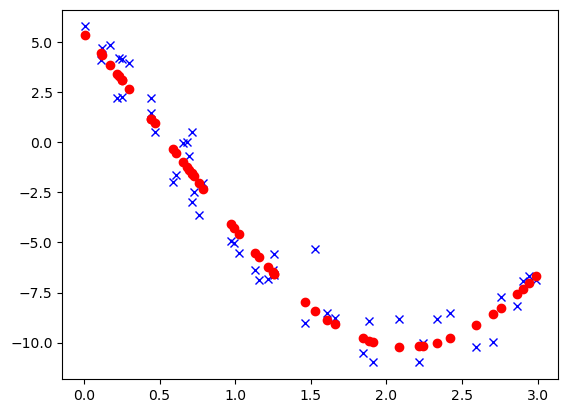

In [161]:
import numpy as np

# #1)
# Assuming x and y are your data
x = 3 * np.random.rand(50) # this is a 1x50 array or a 1d array with 50 elements
print(x.shape)
print(x[:2])
print('sin of first 2 elements:',np.sin(x[:2]))
# x = x.reshape(-1,1) # this is a 50x1 array with feature in each column
# e is a  vector of random noise
# print('x shape after transform:',x.shape)
print('x size:',x.size) # gives total number of elements in the array
e = 1 * np.random.randn(x.size) # normal noise

y = 10 * np.cos(x + 1) + e 
print('y shape:',y.shape)
#2)
# Design matrix for the function
X = np.ones((x.size, 2)) # 50x2 array
print('X shape:',X.shape)
print('X first column:',X[:,0].shape)
X[:, 0] = np.sin(x) # set the first column of X to sin(x)
X[:, 1] = np.cos(x) # set the second column of X to cos(x)
print('X first 2 rows:',X[:2])
# Solve for b using the normal equation
b = np.linalg.inv(X.T @ X) @ X.T @ y.T
print('b shape:',b.shape)   

# Now b contains the coefficients of the function
print("Fitted coefficients:", b)

# To evaluate the function at specific points, you can use matrix multiplication
y_fit = X @ b

print("Fitted values:", y_fit)

#4)

plt.plot(x,y,'bx');
plt.plot(x,y_fit,'ro');


### Heteroscedastic error

- Simple modification

>$\displaystyle C = \sum_{i=1}^N w_i \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k\right\}^2$
> <br/><br/>
> yields
> <br/><br/>
>$\displaystyle \sum_i w_i \left\{ y_i - \sum_{k} X_{ik} \hat\beta_k\ \right\}\, X_{il}  = 0$
> <br/><br/>
>$\displaystyle \sum_i  X_{il} w_i y_i = \sum_k \left(\sum_i X_{il} w_i X_{ik}\right) \hat{\beta}_k$


- Diagonal weight matrix $W$

>$\displaystyle X^T W y = X^T W X \hat{\beta} $
> <br/><br/>
>$\displaystyle \hat\beta = (X^T W X)^{-1} X^T W y $
> <br/><br/>
> If not diagonal, correlated errors!

